In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as px

# Sleep Data Cleaning


In [18]:
sleep_data=pd.read_csv('sleep.csv')
sleep_data=sleep_data[['efficiency','quality','com.samsung.health.sleep.end_time','com.samsung.health.sleep.start_time',
          'com.samsung.health.sleep.time_offset',"com.samsung.health.sleep.update_time",
          'com.samsung.health.sleep.create_time']]
sleep_data.columns=['efficiency','quality','end_time','start_time','time_offset','update_time','create_time']

sleep_data.head()

,efficiency,quality,end_time,start_time,time_offset,update_time,create_time
0,91.540790,NaN,1538205120000,1538185320000,UTC-0400,1538205990294,1538205990294
1,90.769230,NaN,1536662400000,1536635160000,UTC-0400,1536663146013,1536663146013
2,97.391304,NaN,1535714940000,1535708100000,UTC-0400,1535715043724,1535715043724
3,92.555330,NaN,1543055160000,1543025400000,UTC-0500,1543055270788,1543055270788
4,92.663040,50003.0,1520501400000,1520479380000,UTC-0500,1520516398387,1520501522181


In [21]:
from datetime import datetime
import math
def dateconv(row):
    import calendar
    row['start_time']=datetime.fromtimestamp(row['start_time']/1000)
    row['end_time']=datetime.fromtimestamp(row['end_time']/1000)
    row['update_time']=datetime.fromtimestamp(row['update_time']/1000)
    row['create_time']=datetime.fromtimestamp(row['create_time']/1000)
    row['sleep_duration_in_hour']=(row['end_time']-row['start_time']).seconds/3600
    row['Date']= row['start_time'].date()
    row['week_day']=row['Date'].strftime('%A')
    row['year_month']=row['Date'].strftime('%Y-%m')
    row['sleep_start_hour']=row['start_time'].hour
    row['sleep_wakeup_hour']=row['end_time'].hour
    return(row)

from datetime import timedelta
def UTC(row):
    tdelta=timedelta(hours=int(row['time_offset'].strip('UTC').strip('0')))
    row['start_time']+= tdelta
    row['end_time']+= tdelta
    row['update_time']+= tdelta
    row['create_time']+= tdelta
    return(row)

def dateconv2(row):
    row['week_number_in_year']=row['Date'].isocalendar()[1]
    row['month']=row['Date'].strftime('%B')
    
    return(row)

def delta(row):
    
    row['delta']=row['delta'].seconds/3600
    
    return(row)

def duration(row):
    
     row['sleep_duration_in_hour']=(row['end_time']-row['start_time']).seconds/3600
    
     return(row)

def clean(df):
    df.sort_values('start_time',inplace=True)
    
    df['next_start_time']=np.nan
    df['next_start_time'].iloc[:-1]=df['start_time'].iloc[1:].values
    df['next_start_time']/=1000000
    df['next_start_time']=pd.to_datetime(df['next_start_time'],unit='ms')
    
    df['next_end_time']=np.nan
    df['next_end_time'].iloc[:-1]=df['end_time'].iloc[1:].values
    df['next_end_time']/=1000000
    df['next_end_time']=pd.to_datetime(df['next_end_time'],unit='ms')
    
    
    df['delta']=df.next_start_time-df.end_time
    df=df.apply(delta,axis=1)
    df=df.apply(duration,axis=1)
    
    
    return df


In [19]:
sleep_data=sleep_data.apply(dateconv,axis=1)

In [5]:
sleep_data.time_offset.unique()

array(['UTC-0400', 'UTC-0500', 'UTC-0800', 'UTC+0200'], dtype=object)

Text(0.5, 1.0, 'Travel Effect on Sleep')

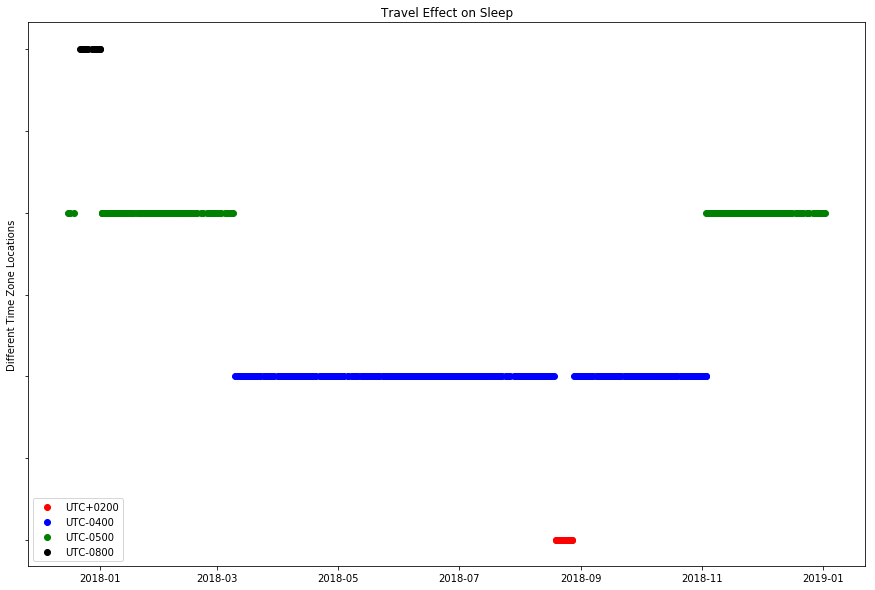

In [8]:
sleep_data_U4= sleep_data[sleep_data.time_offset=='UTC-0400']
sleep_data_U5= sleep_data[sleep_data.time_offset=='UTC-0500']
sleep_data_U8= sleep_data[sleep_data.time_offset=='UTC-0800']
sleep_data_U2= sleep_data[sleep_data.time_offset=='UTC+0200']

plt.figure(figsize=(15,10))

Y1= np.repeat(1,repeats=(len(sleep_data_U2)))
Y2= np.repeat(2,repeats=(len(sleep_data_U4)))
Y3= np.repeat(3,repeats=(len(sleep_data_U5)))
Y4= np.repeat(4,repeats=(len(sleep_data_U8)))


X1= sleep_data_U2.Date.values
X2= sleep_data_U4.Date.values
X3= sleep_data_U5.Date.values
X4= sleep_data_U8.Date.values


ax = plt.gca()


ax.scatter(X1,Y1,color='red', label='UTC+0200')
ax.scatter(X2,Y2,color='blue', label='UTC-0400')
ax.scatter(X3,Y3,color='green', label='UTC-0500')
ax.scatter(X4,Y4,color='black', label='UTC-0800')

ax.legend(loc=3)


labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_yticklabels(empty_string_labels)
ax.set_ylabel('Different Time Zone Locations')

plt.title('Travel Effect on Sleep')

UTC-5 and UTC-8 are for the same location because the time change happens exactly on March 11th and November 4th.

In [22]:
df=sleep_data.copy()
df=clean(df)

droplist=df[df['delta']<2]
df.end_time[df['delta']<2]= df.next_end_time[df['delta']<2]
df=df[~df['start_time'].isin(droplist['next_start_time'])]
df=clean(df)

droplist=df[df['delta']<2]
df.end_time[df['delta']<2]= df.next_end_time[df['delta']<2]
df=df[~df['start_time'].isin(droplist['next_start_time'])]
df=clean(df)


C:\Users\a_raf\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\a_raf\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
df.to_csv('sleep_clean_data.csv')

# Exercise Data Cleaning

In [27]:
from dateutil.parser import parse

def ddate(row):
    tdelta=timedelta(hours=int(row['time_offset'].strip('UTC').strip('0')))
    row['start_time']=parse(row['start_time'])+tdelta
    row['end_time']=parse(row['end_time'])+tdelta
    row['create_time']=parse(row['create_time'])+tdelta
    row['update_time']=parse(row['update_time'])+tdelta
    row['Duration_in_min']=row['duration']/60000
    row['hour_start']=row.start_time.hour
    row['Date']= row['start_time'].date()
    row['activity_hour_start']=row['start_time'].hour
    row['activity_minute_start']=row['start_time'].minute
    row['week_day']=row['Date'].strftime('%A')
    row['year_month']=row['Date'].strftime('%Y-%m')
    return(row) 

def clean(df):
    df.sort_values('start_time',inplace=True)
    
    df['next_start_time']=np.nan
    df['next_start_time'].iloc[:-1]=df['start_time'].iloc[1:].values
    df['next_start_time']/=1000000
    df['next_start_time']=pd.to_datetime(df['next_start_time'],unit='ms')
    
    df['next_end_time']=np.nan
    df['next_end_time'].iloc[:-1]=df['end_time'].iloc[1:].values
    df['next_end_time']/=1000000
    df['next_end_time']=pd.to_datetime(df['next_end_time'],unit='ms')
    
    df['next_start_activity']=np.nan
    df['next_start_activity'].iloc[:-1]=df['exercise_type'].iloc[1:].values
    
    df['delta']=df.next_start_time-df.end_time
    df=df.apply(delta,axis=1)
    df=df.apply(duration_min,axis=1)
    
    
    return df

def duration_min(row):
    
     row['Duration_in_min']=(row['end_time']-row['start_time']).seconds/60
    
     return(row)

In [28]:
exercise_data=pd.read_csv('exercise.csv')
exercise_data=exercise_data.apply(ddate,axis=1)

exertype=["Running","Hiking","Cycling","Walking","Elliptical","Custom","Swimming"]
exercise_data.exercise_type.replace(exercise_data.exercise_type.unique(),exertype,inplace=True)

In [29]:
exercise_data['cal_dur']=exercise_data.calorie/exercise_data.Duration_in_min
exercise_data['dist_dur']=exercise_data.distance/exercise_data.Duration_in_min

print(exercise_data.groupby('exercise_type').cal_dur.describe())
exercise_data.groupby('exercise_type').dist_dur.describe()

               count       mean       std       min        25%        50%  \
exercise_type                                                               
Custom           1.0   6.321011       NaN  6.321011   6.321011   6.321011   
Cycling        115.0   5.360798  0.206152  4.638578   5.318134   5.319166   
Elliptical      22.0  11.764979  3.102464  1.263590  10.232512  12.156736   
Hiking          77.0   8.399498  0.003227  8.375000   8.400000   8.400000   
Running        639.0   4.313516  0.567356  3.056618   3.922815   4.251192   
Swimming         1.0   6.999939       NaN  6.999939   6.999939   6.999939   
Walking         21.0  10.030963  2.130992  2.238057   9.500000  11.199956   

                     75%        max  
exercise_type                        
Custom          6.321011   6.321011  
Cycling         5.319799   6.512426  
Elliptical     13.637114  16.347598  
Hiking          8.400000   8.400000  
Running         4.636162   6.864563  
Swimming        6.999939   6.999939  
Wa

,count,mean,std,min,25%,50%,75%,max
exercise_type,,,,,,,,
Custom,1.0,54.782096,NaN,54.782096,54.782096,54.782096,54.782096,54.782096
Cycling,99.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Elliptical,22.0,142.581875,41.596847,0.000000,120.103553,156.640030,168.819846,186.006270
Hiking,77.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Running,639.0,71.434051,10.723165,0.000000,65.202707,72.881049,78.282082,110.889399
Swimming,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walking,8.0,196.062717,202.037099,0.000000,0.000000,182.651957,337.769577,524.279116


In [30]:
df=exercise_data.copy()
df=clean(df)
# Below the code is finding all the instances that Running activity happens completly within another Running activity and deletes it.
droplist=df.loc[(df['end_time']>df['next_start_time'])&(df['end_time']>df['next_end_time'])&(df['next_start_activity']=='Running')&(df['exercise_type']=='Running'),['next_start_time']]

df=df[~df['start_time'].isin(droplist['next_start_time'])]

df=clean(df)
#Below the code finds the running activity which starts in the middle of another running activity
#and extends beyond the first running activity. It replaces the end time of the current activity
#with the next activities end time. It also recalculates duration and estimates distance and calorie
#burn based on new duration of activity and at the end deletes the second activity.
droplist=df.loc[(df['end_time']>=df['next_start_time'])&(df['next_start_activity']=='Running')\
       &(df['exercise_type']=='Running'),['next_start_time','next_end_time']]
df.loc[df['next_start_time'].isin(droplist['next_start_time']),['end_time']]=droplist['next_end_time']
df=df.apply(duration_min,axis=1)

list1=list(df.loc[df['next_start_time'].isin(droplist['next_start_time']),['calorie']].values)
list2=list((df.loc[df['next_start_time'].isin(droplist['next_start_time']),['Duration_in_min']]*4.251192).values)
df.loc[df['next_start_time'].isin(droplist['next_start_time']),['calorie']].replace(list1,list2)

list1=list(df.loc[df['next_start_time'].isin(droplist['next_start_time']),['distance']].values)
list2=list((df.loc[df['next_start_time'].isin(droplist['next_start_time']),['Duration_in_min']]*72.881049).values)
df.loc[df['next_start_time'].isin(droplist['next_start_time']),['distance']].replace(list1,list2)


df=df[~df['start_time'].isin(droplist['next_start_time'])]

df=clean(df)
#/code below looks at any other activity that is interfering with running and deletes the running activity.
droplist=df.loc[(df['end_time']>df['next_start_time'])&(df['exercise_type']=='Running'),['start_time']]
df=df[~df['start_time'].isin(droplist['start_time'])]
droplist=df.loc[(df['end_time']>df['next_start_time'])&(df['next_start_activity']=='Running'),['next_start_time']]
df=df[~df['start_time'].isin(droplist['next_start_time'])]
df=clean(df)
#The code below finds the other activites that their next start activity starts from the middle of 
#another activity and calulates the new end time and sums the calories for them. the reason for summing,
#and not estimating is that the start time of the next activity is so near the end time of the first
#activity that summation seems reasonable.
droplist= df.loc[(df['end_time']>df['next_start_time'])]


df.loc[df['next_start_time'].isin(droplist['next_start_time']),['calorie']]+=\
df.loc[df['start_time'].isin(droplist['next_start_time']),['calorie']].values
df.loc[df['next_start_time'].isin(droplist['next_start_time']),['end_time']]=droplist['next_end_time']
df=df[~df['start_time'].isin(droplist['next_start_time'])]
df=clean(df)

C:\Users\a_raf\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
droplist=df.loc[(df['next_start_activity']==df['exercise_type'])&(df['delta']<=0.1),['next_start_time','next_end_time']]

list1=list(df.loc[df['next_start_time'].isin(droplist['next_start_time']),['calorie']].values)
list2=list(df.loc[df['start_time'].isin(droplist['next_start_time']),['calorie']].values+np.array(list1))
df.loc[df['next_start_time'].isin(droplist['next_start_time']),['calorie']].replace(list1,list2)

list1=list(df.loc[df['next_start_time'].isin(droplist['next_start_time']),['distance']].values)
list2=list(df.loc[df['start_time'].isin(droplist['next_start_time']),['distance']].values+np.array(list1))
df.loc[df['next_start_time'].isin(droplist['next_start_time']),['distance']].replace(list1,list2)


df.loc[df['next_start_time'].isin(droplist['next_start_time']),['end_time']]=droplist['next_end_time']
df=df[~df['start_time'].isin(droplist['next_start_time'])]
df=clean(df)

df=df[df['Duration_in_min']>=10]

In [32]:
df.to_csv('clean_exercise')

# Heartrate Data

In [43]:
heart_data=pd.read_csv('heart_rate.csv')
heart_data.head()

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,deviceuuid,max,min,pkg_name,time_offset,custom,comment,datauuid,create_time
0,0,2018-12-12 09:30:29.257,57.0,NaN,2018-12-12 09:30:29.257,1,2018-12-12 09:35:00.239,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0500,NaN,NaN,0002f020-959a-8d57-4380-35d995bc7b86,2018-12-12 09:35:00.239
1,1,2018-10-23 18:00:29.301,60.0,NaN,2018-10-23 18:00:29.301,1,2018-10-23 18:15:00.330,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,000334b3-bf4c-f59e-f710-a9f4d4a748a0,2018-10-23 18:15:00.330
2,2,2018-07-22 06:10:29.318,66.0,NaN,2018-07-22 06:10:29.318,1,2018-07-22 06:15:00.249,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,00066e92-c981-df35-819d-8b2e230bc3d4,2018-07-22 06:15:00.249
3,3,2018-10-08 02:00:29.324,69.0,NaN,2018-10-08 02:00:29.324,1,2018-10-08 02:13:22.101,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,0007c0e9-1f83-749e-5b46-1a09ff73be3e,2018-10-08 02:13:22.101
4,4,2018-08-29 06:30:29.290,58.0,NaN,2018-08-29 06:30:29.290,1,2018-08-29 06:35:00.241,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,000caa8c-6ccf-44ca-4f4a-95b77c3433e8,2018-08-29 06:35:00.241


In [42]:
from dateutil.parser import parse

def ddate_heart(row):
    row['start_time']=parse(row['start_time'])
    row['end_time']=parse(row['end_time'])
    row['duration_in_sec']=(row['end_time']-row['start_time']).seconds
    row['Date']= row['start_time'].date()
    row['heart_rate_hour']=row['start_time'].hour
    return(row) 

def UTC(row):
    tdelta=timedelta(hours=int(row['time_offset'].strip('UTC').strip('0')))
    row['start_time']+= tdelta
    row['end_time']+= tdelta
    #row['update_time']+= tdelta
    #row['create_time']+= tdelta
    return(row)

In [44]:
heart_data=heart_data.apply(ddate_heart,axis=1)
heart_data=heart_data.apply(UTC,axis=1)
heart_data=heart_data[['Date','heart_rate_hour','heart_rate']]

Text(0.5, 1.0, 'Heart Rate Measured in Time')

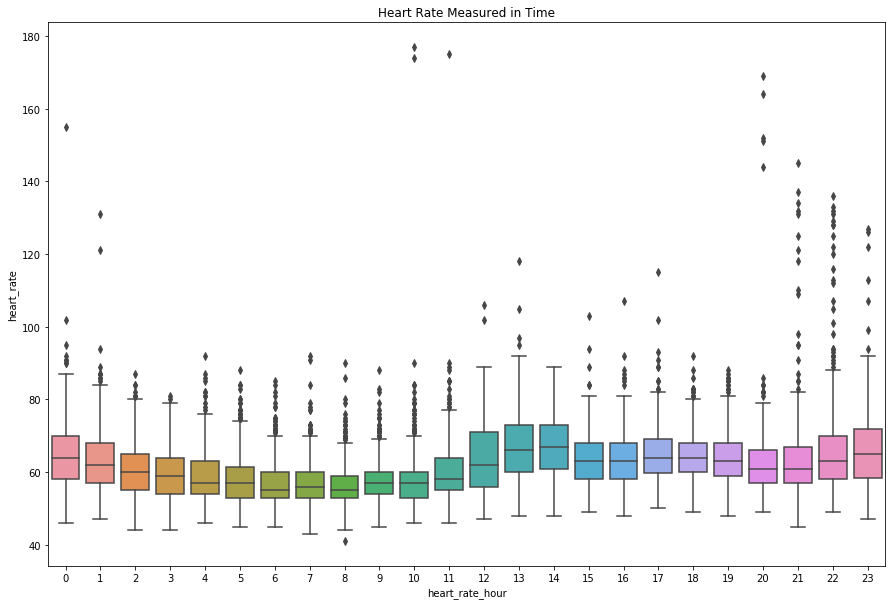

In [45]:
plt.figure(figsize=(15,10))

import seaborn as sns
df= heart_data[['heart_rate_hour','heart_rate']]
 
# Usual boxplot
ax = sns.boxplot(x='heart_rate_hour', y='heart_rate', data=df)
 
# Add jitter with the swarmplot function.
#ax = sns.swarmplot(x='heart_rate_hour', y='heart_rate', data=df, color="grey")

plt.title("Heart Rate Measured in Time")

# Step Count Data Cleaning

In [47]:
step_count_data=pd.read_csv('step_count.csv')
step_count_data=step_count_data.drop_duplicates()
step_count_data.head()

,Unnamed: 0,end_time,start_time,count,calorie,sample_position_type,deviceuuid,update_time,speed,pkg_name,time_offset,custom,distance,datauuid,create_time
0,0,2018-12-26 23:27:59.999,2018-12-26 23:27:00.000,70,3.44,230002.0,F/D7+hL5E5,2018-12-26 23:35:00.296,1.833333,com.sec.android.app.shealth,UTC-0500,NaN,60.88,00083c05-4f22-1522-694a-36bd54e6f09b,2018-12-26 23:35:00.296
1,1,2018-12-08 23:12:00.000,2018-12-08 23:11:00.000,1,0.04,NaN,jQfnryI8/B,2018-12-08 23:11:00.484,1.333333,com.sec.android.app.shealth,UTC-0500,NaN,0.77,00122feb-c1d7-497f-98ad-0c0e31e89465,2018-12-08 23:11:00.484
2,2,2018-12-08 21:53:59.999,2018-12-08 21:53:00.000,30,1.25,230002.0,F/D7+hL5E5,2018-12-08 21:55:00.238,1.250000,com.sec.android.app.shealth,UTC-0500,NaN,21.25,00152c2f-41ce-c19e-67c0-264c410a6a77,2018-12-08 21:55:00.237
3,3,2019-01-02 13:34:00.000,2019-01-02 13:33:00.000,37,1.48,NaN,jQfnryI8/B,2019-01-02 13:35:02.630,1.361111,com.sec.android.app.shealth,UTC-0500,NaN,28.58,001ac2c7-696b-4d29-b5f9-4fc4c8db4b66,2019-01-02 13:35:02.630
4,4,2019-01-01 22:36:59.999,2019-01-01 22:36:00.000,18,0.75,230002.0,F/D7+hL5E5,2019-01-01 22:55:00.224,1.500000,com.sec.android.app.shealth,UTC-0500,NaN,12.72,001ba89a-82c9-2b91-359d-778bf774182d,2019-01-01 22:55:00.224


In [48]:
from dateutil.parser import parse

def ddate_step(row):
    row['start_time']=parse(row['start_time'])
    row['end_time']=parse(row['end_time'])
    row['Duration_in_min']=(row['end_time']-row['start_time']).seconds/60
    row['Date']= row['start_time'].date()
    row['walk_time_hour']=row['start_time'].hour
    row['week_day']=row['Date'].strftime('%A')
    row['year_month']=row['Date'].strftime('%Y-%m')
    return(row) 

def clean(df):
    df.sort_values(['start_time','end_time'],ascending=[True, False],inplace=True)
    
    df['next_start_time']=np.nan
    df['next_start_time'].iloc[:-1]=df['start_time'].iloc[1:].values
    df['next_start_time']/=1000000
    df['next_start_time']=pd.to_datetime(df['next_start_time'],unit='ms')
    
    df['next_end_time']=np.nan
    df['next_end_time'].iloc[:-1]=df['end_time'].iloc[1:].values
    df['next_end_time']/=1000000
    df['next_end_time']=pd.to_datetime(df['next_end_time'],unit='ms')
    
    #df['next_start_activity']=np.nan
    #df['next_start_activity'].iloc[:-1]=df['exercise_type'].iloc[1:].values
    
    df['delta']=df.next_start_time-df.end_time
    df=df.apply(delta,axis=1)
    df=df.apply(duration_min,axis=1)
    
    
    return df

def duration_min(row):
    
     row['Duration_in_min']=(row['end_time']-row['start_time']).seconds/60
    
     return(row)

    

In [49]:
step_count_data=step_count_data.apply(ddate_step,axis=1)
step_count_data=step_count_data.apply(UTC,axis=1)

In [50]:
df=step_count_data.copy()
df=clean(df)
# Below the code is finding all the instances that Running activity happens completly within another Running activity and deletes it.

while len(df.loc[(df['end_time']>=df['next_start_time'])&(df['end_time']>=df['next_end_time'])])>0:
    droplist=df.loc[(df['end_time']>=df['next_start_time'])&(df['end_time']>=df['next_end_time'])]
    df=df[~df['start_time'].isin(droplist['next_start_time'])]
    df=clean(df)


C:\Users\a_raf\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
df=df.groupby(['Date','walk_time_hour'])['count','calorie','distance','Duration_in_min'].agg({'count': np.sum,\
                        'calorie': np.sum,'distance': np.sum, 'Duration_in_min': np.sum})
df.sort_index(inplace=True),
df.reset_index(inplace=True)

In [53]:
df.to_csv('step_count_clean_agg.csv')

# Floor Climb Data Cleaning

In [54]:
from dateutil.parser import parse

def ddate_climb(row):
    row['start_time']=parse(row['start_time'])
    row['end_time']=parse(row['end_time'])
    row['Duration_in_min']=(row['end_time']-row['start_time']).seconds/60
    row['Date']= row['start_time'].date()
    row['climb_time_hour']=row['start_time'].hour
    
    return(row) 

from datetime import timedelta

def UTC(row):
    tdelta=timedelta(hours=int(row['time_offset'].strip('UTC').strip('0')))
    row['start_time']+= tdelta
    row['end_time']+= tdelta
    
    return(row)

def clean(df):
    df.sort_values(['start_time','end_time'],ascending=[True, False],inplace=True)
    
    df['next_start_time']=np.nan
    df['next_start_time'].iloc[:-1]=df['start_time'].iloc[1:].values
    df['next_start_time']/=1000000
    df['next_start_time']=pd.to_datetime(df['next_start_time'],unit='ms')
    
    df['next_end_time']=np.nan
    df['next_end_time'].iloc[:-1]=df['end_time'].iloc[1:].values
    df['next_end_time']/=1000000
    df['next_end_time']=pd.to_datetime(df['next_end_time'],unit='ms')
    
    df['delta']=df.next_start_time-df.end_time
    df=df.apply(delta,axis=1)
    df=df.apply(duration_min,axis=1)
    
    
    return df

def duration_min(row):
    
     row['Duration_in_min']=(row['end_time']-row['start_time']).seconds/60
    
     return(row)

def delta(row):
    
    row['delta']=row['delta'].seconds/3600
    
    return(row)

In [55]:
floor_climb_data=pd.read_csv('floors_climbed.csv')
floor_climb_data.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,custom,floor,datauuid,update_time,deviceuuid,create_time
0,0,2018-08-10 21:31:42.000,com.sec.android.app.shealth,UTC-0400,2018-08-10 21:30:01.000,NaN,8.0,000e4bf1-b1c0-2ec3-e713-826b9c3fef22,2018-08-10 21:31:53.453,F/D7+hL5E5,2018-08-10 21:31:52.856
1,1,2018-11-06 22:33:11.000,com.sec.android.app.shealth,UTC-0500,2018-11-06 22:32:54.000,NaN,1.0,0022234b-37ac-242d-bd1d-6a3bf2640b8d,2018-11-06 22:46:57.117,F/D7+hL5E5,2018-11-06 22:46:57.116
2,2,2018-07-03 11:50:25.000,com.sec.android.app.shealth,UTC-0400,2018-07-03 11:50:11.000,NaN,1.0,003cf4e5-e2e7-3282-6400-0b2f13e46ab5,2018-07-03 11:52:31.712,F/D7+hL5E5,2018-07-03 11:52:31.712
3,3,2018-01-25 02:30:56.000,com.sec.android.app.shealth,UTC-0500,2018-01-25 02:29:51.000,NaN,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-25 02:34:47.756,F/D7+hL5E5,2018-01-25 02:34:47.720
4,4,2018-07-03 12:42:05.000,com.sec.android.app.shealth,UTC-0400,2018-07-03 12:41:54.000,NaN,1.0,008bbe7f-26f7-5c1f-7f5d-5fa6d3e73f1c,2018-07-03 12:52:03.893,F/D7+hL5E5,2018-07-03 12:52:03.893


In [56]:
floor_climb_data=floor_climb_data[['start_time','end_time','floor','time_offset']]
floor_climb_data=floor_climb_data.apply(ddate_climb,axis=1)
floor_climb_data=floor_climb_data.apply(UTC,axis=1)

In [57]:
floor_climb_data.to_csv('floor_clean.csv')

# Comparing Summary to Walk Data

In [84]:
summary=pd.read_csv('summary.csv')
summary.head()

,Unnamed: 0,longest_idle_time,score,extra_data,goal,calorie,run_time,deviceuuid,update_time,longest_active_time,day_time,walk_time,pkg_name,active_time,distance,others_time,step_count,datauuid,create_time
0,0,15780000,0,00179515-d385-4f61-81a7-2ddd68ac80b2.extra_dat...,-1,927.15780,76845,jQfnryI8/B,2018-01-15 12:48:58.842,2400000,1515888000000,8814507,com.sec.android.app.shealth,11291352,9196.5030,2400000,12889,00179515-d385-4f61-81a7-2ddd68ac80b2,2018-01-14 05:00:56.527
1,1,22140000,0,003f0597-41ad-4f7f-bd02-6683076a1535.extra_dat...,-1,971.60400,43840,jQfnryI8/B,2018-01-04 11:41:12.193,5363575,1514937600000,5720581,com.sec.android.app.shealth,11982148,6962.8965,6217727,13135,003f0597-41ad-4f7f-bd02-6683076a1535,2018-01-03 05:03:32.135
2,2,24660000,76,004dfa57-ff07-44f3-8d54-d3b9c09d41c5.extra_dat...,60,207.74994,77742,jQfnryI8/B,2016-09-03 06:20:16.720,240000,1472774400000,2726451,com.sec.android.app.shealth,2804193,3679.9102,0,4407,004dfa57-ff07-44f3-8d54-d3b9c09d41c5,2016-09-02 07:00:51.323
3,3,36420000,83,00d6b2b2-0211-4a80-a213-a0c2ef981715.extra_dat...,60,240.44005,55497,jQfnryI8/B,2016-07-25 05:48:14.487,540000,1469318400000,3051950,com.sec.android.app.shealth,3107447,4135.3003,0,5200,00d6b2b2-0211-4a80-a213-a0c2ef981715,2016-07-24 07:03:17.688
4,4,30660000,0,00d6cc12-a5c4-41c7-aa76-d81b38d49fb2.extra_dat...,-1,167.93997,6451,jQfnryI8/B,2017-10-23 01:35:00.001,600000,1508630400000,2480173,com.sec.android.app.shealth,2486624,3124.7898,0,4015,00d6cc12-a5c4-41c7-aa76-d81b38d49fb2,2017-10-22 04:15:01.831


In [85]:
from datetime import datetime
import math
def dateconv(row):
    import calendar
    row['day_time']=datetime.fromtimestamp(row['day_time']/1000)
    row['longest_idle_time']/=60000
    row['active_time']/=60000
    row['run_time']/=60000
    row['longest_active_time']/=60000
    row['walk_time']/=60000
    row['Date']= row['day_time'].date()
    
    return(row)


In [86]:
summary=summary.apply(dateconv,axis=1)
summary=summary[['Date','longest_idle_time','calorie','run_time','longest_active_time','day_time','walk_time','active_time','distance','step_count']]
summary.sort_values('Date',inplace=True)

In [87]:
summary_step_count=summary[['Date','step_count']]
step_count=pd.read_csv('step_count_clean_agg.csv')
step_count.Date=pd.to_datetime(step_count.Date)
summary_step_count.Date=pd.to_datetime(summary_step_count.Date)

In [88]:
step_count2=step_count.groupby('Date')['count','calorie','distance','Duration_in_min'].agg({'count': np.sum,\
                        'calorie': np.sum,'distance': np.sum, 'Duration_in_min': np.sum})
step_count2.sort_index(inplace=True),
step_count2.reset_index(inplace=True)
step_count2=step_count2[['Date','count']]

In [89]:
step_merge=pd.merge(summary_step_count,step_count2,left_on=['Date'],right_on=['Date'])
step_merge

,Date,step_count,count
0,2018-11-29,2562,1037
1,2018-11-30,2371,1378
2,2018-12-01,8477,1987
3,2018-12-02,5975,7015
4,2018-12-03,4167,3846
5,2018-12-04,5176,2225
6,2018-12-05,2468,3369
7,2018-12-06,2556,2189
8,2018-12-07,6644,2097
9,2018-12-08,4082,4640


Looking at above it seems like my step count is much less than the summary step  count. This might be because of my data being cleaned and all the instances of walkings that happend at the same time, were identified and cleaned.
Due to the very short time period I was not able to look more into this data.